In [1]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import math

# Reading Datas

In [73]:
prof_id = pd.read_excel('Database.xlsx',
                        sheet_name='Sheet1')
prof_id

,ID,Name
0,9987,Mahmood Hosseini
1,9786,Hamide Razavi
2,9685,Majid Salari
3,9097,Rahele Yari
4,9543,Hamidreza Koosha
5,9954,Yaser Bani Hashemi
6,9394,Frazad Dehghanian
7,9196,Babak Rezaee
8,9026,Alireza Shadman
9,9172,Mohammad Ranjbar


created a dict for profs and their code

In [74]:
profs_dict = dict(zip(prof_id['ID'], prof_id['Name']))
profs_dict

{9987: 'Mahmood Hosseini',
 9786: 'Hamide Razavi',
 9685: 'Majid Salari',
 9097: 'Rahele Yari',
 9543: 'Hamidreza Koosha',
 9954: 'Yaser Bani Hashemi',
 9394: 'Frazad Dehghanian',
 9196: 'Babak Rezaee',
 9026: 'Alireza Shadman',
 9172: 'Mohammad Ranjbar',
 9421: 'Mohammad Zahrani'}

In [75]:
prof_speciality_code = pd.read_excel('Database.xlsx',
                                     sheet_name='Sheet2')
prof_speciality_code

,Prof ID,Spec ID,Priority
0,9987,1,1
1,9786,3,1
2,9786,5,2
3,9786,6,3
4,9543,7,2
5,9543,5,1
6,9954,7,1
7,9394,4,1
8,9196,7,1
9,9026,3,1


In [76]:
prof_speciality_name = pd.read_excel('Database.xlsx',
                                     sheet_name='Sheet3')
prof_speciality_name

,Spec ID,Name
0,1,Optimization
1,2,Simulation
2,3,Logistic
3,4,Financial Systems
4,5,Project Control
5,6,Data Anaylsis
6,7,Fuzzy Logic
7,8,Queuing Theory


In [77]:
students_data = pd.read_excel('Database.xlsx',
                              sheet_name='Sheet4')
students_data

,Student ID,Name,Degree,Thesis Topic,Approval Date,Defense Date,Grade
0,9822743012,Abbasi,Master,Simulation,2021-01-12,2022-12-12,18.00
1,9722743218,Hosseini,PHD,Logistic,2021-02-13,2022-07-11,15.00
2,9922743150,Mohammadi,Master,Financial Systems,2020-12-13,2021-10-09,19.00
3,9812743388,Moradi,PHD,Logistic,2021-03-14,NaT,NaN
4,9822743183,Nemati,PHD,Project Control,2019-03-11,2021-04-07,18.34
5,9712743062,Kazemi,PHD,Data Anaylsis,2021-11-28,2023-01-29,20.00
6,9712743108,Jahani,Master,Fuzzy Logic,2021-02-18,NaT,NaN
7,9812743139,Abhari,Master,Queuing Theory,2021-09-24,2022-02-17,16.78


In [78]:
students_profs = pd.read_excel('Database.xlsx',
                               sheet_name='Sheet5')
students_profs

,Stu ID,Supervisor ID,Prof 1,Prof 2
0,9812743388,9543,9954,9196
1,9722743183,9954,9026,9685
2,9712743062,9394,9543,9172
3,9822743012,9196,9026,9786
4,9722743218,9026,9172,9987
5,9722743150,9172,9421,9394
6,9712743108,9786,9097,9196
7,9812743139,9685,9394,9954


In [79]:
students_profs = students_profs.rename(columns={'Supervisor ID': 'supervisor',
                                        'Prof 1 ': 'prof1',
                                        'Prof 2': 'prof2'})

In [80]:
students_profs

,Stu ID,supervisor,prof1,prof2
0,9812743388,9543,9954,9196
1,9722743183,9954,9026,9685
2,9712743062,9394,9543,9172
3,9822743012,9196,9026,9786
4,9722743218,9026,9172,9987
5,9722743150,9172,9421,9394
6,9712743108,9786,9097,9196
7,9812743139,9685,9394,9954


In [81]:
students_data = pd.read_excel('Database.xlsx',
                              sheet_name='Sheet4')
students_data

,Student ID,Name,Degree,Thesis Topic,Approval Date,Defense Date,Grade
0,9822743012,Abbasi,Master,Simulation,2021-01-12,2022-12-12,18.00
1,9722743218,Hosseini,PHD,Logistic,2021-02-13,2022-07-11,15.00
2,9922743150,Mohammadi,Master,Financial Systems,2020-12-13,2021-10-09,19.00
3,9812743388,Moradi,PHD,Logistic,2021-03-14,NaT,NaN
4,9822743183,Nemati,PHD,Project Control,2019-03-11,2021-04-07,18.34
5,9712743062,Kazemi,PHD,Data Anaylsis,2021-11-28,2023-01-29,20.00
6,9712743108,Jahani,Master,Fuzzy Logic,2021-02-18,NaT,NaN
7,9812743139,Abhari,Master,Queuing Theory,2021-09-24,2022-02-17,16.78


In [82]:
students_data = students_data.fillna('-')

In [83]:
students_data.insert(7, 'supervisor', '')
students_data.insert(8, 'prof1', '')
students_data.insert(9, 'prof2', '')
student_ids = list(students_profs['Stu ID'])
other_stu_id = list(students_data['Student ID'])
for s in student_ids:
  if s in other_stu_id:
    idx = other_stu_id.index(s)
    students_data.loc[idx, 'supervisor'] = profs_dict[int(students_profs.loc[student_ids.index(s), 'supervisor'])]
    students_data.loc[idx, 'prof1'] = profs_dict[int(students_profs.loc[student_ids.index(s), 'prof1'])]
    students_data.loc[idx, 'prof2'] = profs_dict[int(students_profs.loc[student_ids.index(s), 'prof2'])]

students_data

,Student ID,Name,Degree,Thesis Topic,Approval Date,Defense Date,Grade,supervisor,prof1,prof2
0,9822743012,Abbasi,Master,Simulation,2021-01-12,2022-12-12 00:00:00,18.0,Babak Rezaee,Alireza Shadman,Hamide Razavi
1,9722743218,Hosseini,PHD,Logistic,2021-02-13,2022-07-11 00:00:00,15.0,Alireza Shadman,Mohammad Ranjbar,Mahmood Hosseini
2,9922743150,Mohammadi,Master,Financial Systems,2020-12-13,2021-10-09 00:00:00,19.0,,,
3,9812743388,Moradi,PHD,Logistic,2021-03-14,-,-,Hamidreza Koosha,Yaser Bani Hashemi,Babak Rezaee
4,9822743183,Nemati,PHD,Project Control,2019-03-11,2021-04-07 00:00:00,18.34,,,
5,9712743062,Kazemi,PHD,Data Anaylsis,2021-11-28,2023-01-29 00:00:00,20.0,Frazad Dehghanian,Hamidreza Koosha,Mohammad Ranjbar
6,9712743108,Jahani,Master,Fuzzy Logic,2021-02-18,-,-,Hamide Razavi,Rahele Yari,Babak Rezaee
7,9812743139,Abhari,Master,Queuing Theory,2021-09-24,2022-02-17 00:00:00,16.78,Majid Salari,Frazad Dehghanian,Yaser Bani Hashemi


In [84]:
undifined_students = list(set(students_profs['Stu ID']) - set(students_data['Student ID']))

undifined_students_dict = {}
for u in undifined_students:
  idx = students_profs[students_profs['Stu ID']==u].index[0]
  undifined_students_dict['Student ID'] = u
  undifined_students_dict['Name'] = '-'
  undifined_students_dict['Degree'] = '-'
  undifined_students_dict['Thesis Topic'] = '-'
  undifined_students_dict['Approval Date'] = date(2018, 7, 1)
  undifined_students_dict['Defense Date'] = '-'
  undifined_students_dict['Grade'] = '-'
  undifined_students_dict['semesters'] = '-'
  undifined_students_dict['supervisor'] = profs_dict[students_profs.loc[idx, 'supervisor']]
  undifined_students_dict['prof1'] = profs_dict[students_profs.loc[idx, 'prof1']]
  undifined_students_dict['prof2'] = profs_dict[students_profs.loc[idx, 'prof2']]
  students_data = students_data.append(undifined_students_dict, ignore_index=True)
students_data = students_data.fillna('-')
students_data

,Student ID,Name,Degree,Thesis Topic,Approval Date,Defense Date,Grade,supervisor,prof1,prof2,semesters
0,9822743012,Abbasi,Master,Simulation,2021-01-12 00:00:00,2022-12-12 00:00:00,18.0,Babak Rezaee,Alireza Shadman,Hamide Razavi,-
1,9722743218,Hosseini,PHD,Logistic,2021-02-13 00:00:00,2022-07-11 00:00:00,15.0,Alireza Shadman,Mohammad Ranjbar,Mahmood Hosseini,-
2,9922743150,Mohammadi,Master,Financial Systems,2020-12-13 00:00:00,2021-10-09 00:00:00,19.0,,,,-
3,9812743388,Moradi,PHD,Logistic,2021-03-14 00:00:00,-,-,Hamidreza Koosha,Yaser Bani Hashemi,Babak Rezaee,-
4,9822743183,Nemati,PHD,Project Control,2019-03-11 00:00:00,2021-04-07 00:00:00,18.34,,,,-
5,9712743062,Kazemi,PHD,Data Anaylsis,2021-11-28 00:00:00,2023-01-29 00:00:00,20.0,Frazad Dehghanian,Hamidreza Koosha,Mohammad Ranjbar,-
6,9712743108,Jahani,Master,Fuzzy Logic,2021-02-18 00:00:00,-,-,Hamide Razavi,Rahele Yari,Babak Rezaee,-
7,9812743139,Abhari,Master,Queuing Theory,2021-09-24 00:00:00,2022-02-17 00:00:00,16.78,Majid Salari,Frazad Dehghanian,Yaser Bani Hashemi,-
8,9722743150,-,-,-,2018-07-01,-,-,Mohammad Ranjbar,Mohammad Zahrani,Frazad Dehghanian,-
9,9722743183,-,-,-,2018-07-01,-,-,Yaser Bani Hashemi,Alireza Shadman,Majid Salari,-


In [85]:
import random
import datetime

start_start_date = datetime.date(2018, 1, 1)
start_end_date = datetime.date(2020, 2, 1)
start_time_between_dates = start_end_date - start_start_date
start_days_between_dates = start_time_between_dates.days
start_rand_date = [random.randrange(start_days_between_dates) for i in range(10)]


end_start_date = datetime.date(2020, 1, 1)
end_end_date = datetime.date(2023, 2, 1)
end_time_between_dates = end_end_date - end_start_date
end_days_between_dates = end_time_between_dates.days
end_rand_date = [random.randrange(end_days_between_dates) for i in range(10)]


topics = list(students_data['Thesis Topic'])
degree = ['PHD', 'Master']
supervisors = list(set(students_data['supervisor']) - set(['']))
prof1 = list(set(students_data['prof1']) - set(['']))
prof2 = list(set(students_data['prof2']) - set(['']))

appendix = {'Student ID': [random.randint(9722743100, 9722743300) for i in range((10))],
 'Name': ['Amiri', 'Hasani', 'Ahmadi', 'Alavi', 'Hosseini',
         'Rezaei', 'Javadi', 'Mahdavi', 'Fatemi', 'Asghari'],
 'Degree': [random.choice(degree) for i in range(10)],
 'Thesis Topic': [random.choice(topics) for i in range(10)],
 'Approval Date': [start_start_date + datetime.timedelta(days=rd) for rd in start_rand_date],
 'Defense Date': [end_start_date + datetime.timedelta(days=rd) for rd in end_rand_date],
 'Grade': [random.randint(15, 20) for i in range((10))],
 'supervisor': [random.choice(supervisors) for i in range(10)],
 'prof1':  [random.choice(prof1) for i in range(10)],
 'prof2':  [random.choice(prof2) for i in range(10)],
 'semesters': [0 for i in range(10)],
 'rank_by_year': ['' for i in range(10)]}
appendix_df = pd.DataFrame(appendix)
students_data = students_data.append(appendix_df)
students_data

,Student ID,Name,Degree,Thesis Topic,Approval Date,Defense Date,Grade,supervisor,prof1,prof2,semesters,rank_by_year
0,9822743012,Abbasi,Master,Simulation,2021-01-12 00:00:00,2022-12-12 00:00:00,18.0,Babak Rezaee,Alireza Shadman,Hamide Razavi,-,NaN
1,9722743218,Hosseini,PHD,Logistic,2021-02-13 00:00:00,2022-07-11 00:00:00,15.0,Alireza Shadman,Mohammad Ranjbar,Mahmood Hosseini,-,NaN
2,9922743150,Mohammadi,Master,Financial Systems,2020-12-13 00:00:00,2021-10-09 00:00:00,19.0,,,,-,NaN
3,9812743388,Moradi,PHD,Logistic,2021-03-14 00:00:00,-,-,Hamidreza Koosha,Yaser Bani Hashemi,Babak Rezaee,-,NaN
4,9822743183,Nemati,PHD,Project Control,2019-03-11 00:00:00,2021-04-07 00:00:00,18.34,,,,-,NaN
5,9712743062,Kazemi,PHD,Data Anaylsis,2021-11-28 00:00:00,2023-01-29 00:00:00,20.0,Frazad Dehghanian,Hamidreza Koosha,Mohammad Ranjbar,-,NaN
6,9712743108,Jahani,Master,Fuzzy Logic,2021-02-18 00:00:00,-,-,Hamide Razavi,Rahele Yari,Babak Rezaee,-,NaN
7,9812743139,Abhari,Master,Queuing Theory,2021-09-24 00:00:00,2022-02-17 00:00:00,16.78,Majid Salari,Frazad Dehghanian,Yaser Bani Hashemi,-,NaN
8,9722743150,-,-,-,2018-07-01,-,-,Mohammad Ranjbar,Mohammad Zahrani,Frazad Dehghanian,-,NaN
9,9722743183,-,-,-,2018-07-01,-,-,Yaser Bani Hashemi,Alireza Shadman,Majid Salari,-,NaN


In [86]:
row = row = students_data.iloc[4, :]
def calc_semesters(row):
  app_date = row['Approval Date']
  def_date = row['Defense Date']

  if type(def_date) == str:
    if type(app_date) == str:
      delta = '---'
      return delta
    else:
      app_date = str(app_date)
      def_year = 2023
      def_month = 1
      def_day = 2
      year = int(app_date[:4])
      month = int(app_date[5:7])
      day = int(app_date[8:10])
      d1 = date(def_year, def_month, def_day)
      d0 = date(year, month, day)
      delta = d1 - d0
      return math.ceil((math.ceil((delta.days) / 30)) / 6)
  else:
      def_date = str(def_date)
      def_year = int(def_date[:4])
      def_month = int(def_date[5:7])
      def_day = int(def_date[8:10])

      app_date = str(app_date)
      year = int(app_date[:4])
      month = int(app_date[5:7])
      day = int(app_date[8:10])
      d1 = date(def_year, def_month, def_day)
      d0 = date(year, month, day)
      delta = d1 - d0
      return math.ceil((math.ceil((delta.days) / 30)) / 6)

In [87]:
students_data['semesters'] = students_data.apply(calc_semesters, axis=1)
students_data

,Student ID,Name,Degree,Thesis Topic,Approval Date,Defense Date,Grade,supervisor,prof1,prof2,semesters,rank_by_year
0,9822743012,Abbasi,Master,Simulation,2021-01-12 00:00:00,2022-12-12 00:00:00,18.0,Babak Rezaee,Alireza Shadman,Hamide Razavi,4,NaN
1,9722743218,Hosseini,PHD,Logistic,2021-02-13 00:00:00,2022-07-11 00:00:00,15.0,Alireza Shadman,Mohammad Ranjbar,Mahmood Hosseini,3,NaN
2,9922743150,Mohammadi,Master,Financial Systems,2020-12-13 00:00:00,2021-10-09 00:00:00,19.0,,,,2,NaN
3,9812743388,Moradi,PHD,Logistic,2021-03-14 00:00:00,-,-,Hamidreza Koosha,Yaser Bani Hashemi,Babak Rezaee,4,NaN
4,9822743183,Nemati,PHD,Project Control,2019-03-11 00:00:00,2021-04-07 00:00:00,18.34,,,,5,NaN
5,9712743062,Kazemi,PHD,Data Anaylsis,2021-11-28 00:00:00,2023-01-29 00:00:00,20.0,Frazad Dehghanian,Hamidreza Koosha,Mohammad Ranjbar,3,NaN
6,9712743108,Jahani,Master,Fuzzy Logic,2021-02-18 00:00:00,-,-,Hamide Razavi,Rahele Yari,Babak Rezaee,4,NaN
7,9812743139,Abhari,Master,Queuing Theory,2021-09-24 00:00:00,2022-02-17 00:00:00,16.78,Majid Salari,Frazad Dehghanian,Yaser Bani Hashemi,1,NaN
8,9722743150,-,-,-,2018-07-01,-,-,Mohammad Ranjbar,Mohammad Zahrani,Frazad Dehghanian,10,NaN
9,9722743183,-,-,-,2018-07-01,-,-,Yaser Bani Hashemi,Alireza Shadman,Majid Salari,10,NaN


In [88]:
students_data = students_data.reset_index()
students_data = students_data.drop('index', axis=1)
students_data

,Student ID,Name,Degree,Thesis Topic,Approval Date,Defense Date,Grade,supervisor,prof1,prof2,semesters,rank_by_year
0,9822743012,Abbasi,Master,Simulation,2021-01-12 00:00:00,2022-12-12 00:00:00,18.0,Babak Rezaee,Alireza Shadman,Hamide Razavi,4,NaN
1,9722743218,Hosseini,PHD,Logistic,2021-02-13 00:00:00,2022-07-11 00:00:00,15.0,Alireza Shadman,Mohammad Ranjbar,Mahmood Hosseini,3,NaN
2,9922743150,Mohammadi,Master,Financial Systems,2020-12-13 00:00:00,2021-10-09 00:00:00,19.0,,,,2,NaN
3,9812743388,Moradi,PHD,Logistic,2021-03-14 00:00:00,-,-,Hamidreza Koosha,Yaser Bani Hashemi,Babak Rezaee,4,NaN
4,9822743183,Nemati,PHD,Project Control,2019-03-11 00:00:00,2021-04-07 00:00:00,18.34,,,,5,NaN
5,9712743062,Kazemi,PHD,Data Anaylsis,2021-11-28 00:00:00,2023-01-29 00:00:00,20.0,Frazad Dehghanian,Hamidreza Koosha,Mohammad Ranjbar,3,NaN
6,9712743108,Jahani,Master,Fuzzy Logic,2021-02-18 00:00:00,-,-,Hamide Razavi,Rahele Yari,Babak Rezaee,4,NaN
7,9812743139,Abhari,Master,Queuing Theory,2021-09-24 00:00:00,2022-02-17 00:00:00,16.78,Majid Salari,Frazad Dehghanian,Yaser Bani Hashemi,1,NaN
8,9722743150,-,-,-,2018-07-01,-,-,Mohammad Ranjbar,Mohammad Zahrani,Frazad Dehghanian,10,NaN
9,9722743183,-,-,-,2018-07-01,-,-,Yaser Bani Hashemi,Alireza Shadman,Majid Salari,10,NaN


In [89]:
students_data['rank_by_year'] = ''
for i in range(len(students_data)):
  year = str(students_data.loc[i, 'Student ID'])[:2]
  grade = (students_data.loc[i, 'Grade'])
  sem = (students_data.loc[i, 'semesters'])
  if grade != '-':
    total_rank = (grade/sem)
  else:
    total_rank = '-'
  students_data.loc[i, 'rank_by_year'] = year + ',' + str(total_rank)
students_data.to_csv('all_info.csv', index=False)
students_data

,Student ID,Name,Degree,Thesis Topic,Approval Date,Defense Date,Grade,supervisor,prof1,prof2,semesters,rank_by_year
0,9822743012,Abbasi,Master,Simulation,2021-01-12 00:00:00,2022-12-12 00:00:00,18.0,Babak Rezaee,Alireza Shadman,Hamide Razavi,4,"98,4.5"
1,9722743218,Hosseini,PHD,Logistic,2021-02-13 00:00:00,2022-07-11 00:00:00,15.0,Alireza Shadman,Mohammad Ranjbar,Mahmood Hosseini,3,"97,5.0"
2,9922743150,Mohammadi,Master,Financial Systems,2020-12-13 00:00:00,2021-10-09 00:00:00,19.0,,,,2,"99,9.5"
3,9812743388,Moradi,PHD,Logistic,2021-03-14 00:00:00,-,-,Hamidreza Koosha,Yaser Bani Hashemi,Babak Rezaee,4,"98,-"
4,9822743183,Nemati,PHD,Project Control,2019-03-11 00:00:00,2021-04-07 00:00:00,18.34,,,,5,"98,3.668"
5,9712743062,Kazemi,PHD,Data Anaylsis,2021-11-28 00:00:00,2023-01-29 00:00:00,20.0,Frazad Dehghanian,Hamidreza Koosha,Mohammad Ranjbar,3,"97,6.666666666666667"
6,9712743108,Jahani,Master,Fuzzy Logic,2021-02-18 00:00:00,-,-,Hamide Razavi,Rahele Yari,Babak Rezaee,4,"97,-"
7,9812743139,Abhari,Master,Queuing Theory,2021-09-24 00:00:00,2022-02-17 00:00:00,16.78,Majid Salari,Frazad Dehghanian,Yaser Bani Hashemi,1,"98,16.78"
8,9722743150,-,-,-,2018-07-01,-,-,Mohammad Ranjbar,Mohammad Zahrani,Frazad Dehghanian,10,"97,-"
9,9722743183,-,-,-,2018-07-01,-,-,Yaser Bani Hashemi,Alireza Shadman,Majid Salari,10,"97,-"


In [90]:
def get_year(date):
  return str(date)[:4]
students_data['year'] = students_data['Approval Date'].apply(get_year)
students_data

,Student ID,Name,Degree,Thesis Topic,Approval Date,Defense Date,Grade,supervisor,prof1,prof2,semesters,rank_by_year,year
0,9822743012,Abbasi,Master,Simulation,2021-01-12 00:00:00,2022-12-12 00:00:00,18.0,Babak Rezaee,Alireza Shadman,Hamide Razavi,4,"98,4.5",2021
1,9722743218,Hosseini,PHD,Logistic,2021-02-13 00:00:00,2022-07-11 00:00:00,15.0,Alireza Shadman,Mohammad Ranjbar,Mahmood Hosseini,3,"97,5.0",2021
2,9922743150,Mohammadi,Master,Financial Systems,2020-12-13 00:00:00,2021-10-09 00:00:00,19.0,,,,2,"99,9.5",2020
3,9812743388,Moradi,PHD,Logistic,2021-03-14 00:00:00,-,-,Hamidreza Koosha,Yaser Bani Hashemi,Babak Rezaee,4,"98,-",2021
4,9822743183,Nemati,PHD,Project Control,2019-03-11 00:00:00,2021-04-07 00:00:00,18.34,,,,5,"98,3.668",2019
5,9712743062,Kazemi,PHD,Data Anaylsis,2021-11-28 00:00:00,2023-01-29 00:00:00,20.0,Frazad Dehghanian,Hamidreza Koosha,Mohammad Ranjbar,3,"97,6.666666666666667",2021
6,9712743108,Jahani,Master,Fuzzy Logic,2021-02-18 00:00:00,-,-,Hamide Razavi,Rahele Yari,Babak Rezaee,4,"97,-",2021
7,9812743139,Abhari,Master,Queuing Theory,2021-09-24 00:00:00,2022-02-17 00:00:00,16.78,Majid Salari,Frazad Dehghanian,Yaser Bani Hashemi,1,"98,16.78",2021
8,9722743150,-,-,-,2018-07-01,-,-,Mohammad Ranjbar,Mohammad Zahrani,Frazad Dehghanian,10,"97,-",2018
9,9722743183,-,-,-,2018-07-01,-,-,Yaser Bani Hashemi,Alireza Shadman,Majid Salari,10,"97,-",2018


In [91]:
def integrate_info():
  final_dict = {}
  for i in range(len(students_data)):
    speciality = students_data.loc[i, 'Thesis Topic']
    if students_data.loc[i, 'Grade'] != '-' and students_data.loc[i, 'semesters'] != '-':
      semester = int(students_data.loc[i, 'semesters'])
      grade = int(students_data.loc[i, 'Grade'])
    elif students_data.loc[i, 'Grade'] == '-' and students_data.loc[i, 'semesters'] != '-':
      semester = int(students_data.loc[i, 'semesters'])
      grade = 'not_defined'
    elif students_data.loc[i, 'Grade'] != '-' and students_data.loc[i, 'semesters'] == '-':
      semester = 'not_defined'
      grade = int(students_data.loc[i, 'Grade'])
    elif students_data.loc[i, 'Grade'] == '-' and students_data.loc[i, 'semesters'] == '-':
      semester = 'not_defined'
      grade = 'not_defined'
    degree = students_data.loc[i, 'Degree']
    year = students_data.loc[i, 'year']
    grad = students_data.loc[i, 'Defense Date']
    if grad == '-':
      grad_state = 'not grad'
    else:
      grad_state = 'grad'
    if students_data.loc[i, 'supervisor'] not in list(final_dict.keys()):
      final_dict[students_data.loc[i, 'supervisor']] = [(students_data.loc[i, 'Student ID'],
                                                         3, semester, (grade), speciality, degree, year, grad_state)]
    elif students_data.loc[i, 'supervisor'] in list(final_dict.keys()):
      final_dict[students_data.loc[i, 'supervisor']].append((students_data.loc[i, 'Student ID'],
                                                             3, semester, (grade), speciality, degree, year, grad_state))

    if students_data.loc[i, 'prof1'] not in list(final_dict.keys()):
      final_dict[students_data.loc[i, 'prof1']] = [(students_data.loc[i, 'Student ID'],
                                                    1, semester, (grade), speciality, degree, year, grad_state)]
    elif students_data.loc[i, 'prof1'] in list(final_dict.keys()):
      final_dict[students_data.loc[i, 'prof1']].append((students_data.loc[i, 'Student ID'],
                                                        1, semester, (grade), speciality, degree, year, grad_state))
    
    if students_data.loc[i, 'prof2'] not in list(final_dict.keys()):
      final_dict[students_data.loc[i, 'prof2']] = [(students_data.loc[i, 'Student ID'],
                                                    1, semester, (grade), speciality, degree, year, grad_state)]
    elif students_data.loc[i, 'prof2'] in list(final_dict.keys()):
      final_dict[students_data.loc[i, 'prof2']].append((students_data.loc[i, 'Student ID'],
                                                        1, semester, (grade), speciality, degree, year, grad_state))
  return final_dict

In [92]:
named_dict = integrate_info()
named_dict

{'Babak Rezaee': [(9822743012,
   3,
   4,
   18,
   'Simulation',
   'Master',
   '2021',
   'grad'),
  (9812743388, 1, 4, 'not_defined', 'Logistic', 'PHD', '2021', 'not grad'),
  (9712743108,
   1,
   4,
   'not_defined',
   'Fuzzy Logic',
   'Master',
   '2021',
   'not grad'),
  (9722743106, 1, 6, 18, 'Fuzzy Logic', 'PHD', '2018', 'grad'),
  (9722743189, 1, 10, 15, 'Queuing Theory', 'Master', '2018', 'grad')],
 'Alireza Shadman': [(9822743012,
   1,
   4,
   18,
   'Simulation',
   'Master',
   '2021',
   'grad'),
  (9722743218, 3, 3, 15, 'Logistic', 'PHD', '2021', 'grad'),
  (9722743183, 1, 10, 'not_defined', '-', '-', '2018', 'not grad'),
  (9722743170, 1, 3, 19, 'Logistic', 'Master', '2019', 'grad'),
  (9722743259, 3, 5, 15, 'Data Anaylsis', 'Master', '2018', 'grad')],
 'Hamide Razavi': [(9822743012,
   1,
   4,
   18,
   'Simulation',
   'Master',
   '2021',
   'grad'),
  (9712743108,
   3,
   4,
   'not_defined',
   'Fuzzy Logic',
   'Master',
   '2021',
   'not grad'),
  (972

In [133]:
specs = pd.DataFrame()
j = 0
for k in named_dict.keys():
  for i in range(len(named_dict[k])):
    specs.loc[j, 'prof'] = k
    specs.loc[j, named_dict[k][i][4]] =  named_dict[k][i][1]
  j = j + 1
specs = specs.fillna(0)
specs.to_csv('specialities.csv', index=False)
specs

,prof,Simulation,Logistic,Fuzzy Logic,Queuing Theory,-,Data Anaylsis,Financial Systems,Project Control
0,Babak Rezaee,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,Alireza Shadman,1.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0
2,Hamide Razavi,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
3,Mohammad Ranjbar,1.0,1.0,0.0,1.0,3.0,1.0,1.0,0.0
4,Mahmood Hosseini,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
5,,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6,Hamidreza Koosha,0.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0
7,Yaser Bani Hashemi,1.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0
8,Frazad Dehghanian,0.0,1.0,0.0,1.0,3.0,3.0,3.0,0.0
9,Rahele Yari,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [93]:
def create_df():
    res = {}
    result = pd.DataFrame()
    for k in named_dict.keys():
      counter_2018 = 0
      counter_2019 = 0
      counter_2020 = 0
      counter_2021 = 0
      phd_counter = 0
      master_counter = 0
      refree_count = 0
      grad_counter = 0
      not_grad_counter = 0
      phd_grad_counter = 0
      phd_not_grad_counter = 0
      master_grad_counter = 0
      master_not_grad_counter = 0
      l = len(named_dict[k])
      m = 0
      years_sum = 0
      grade_sum = 0
      for i in range(len(named_dict[k])):
        if named_dict[k][i][1] == 1:
          refree_count = refree_count + 1
        years_sum = years_sum + named_dict[k][i][2]
        if named_dict[k][i][3] != 'not_defined':
          grade_sum = grade_sum + named_dict[k][i][3]
          not_grad_counter = not_grad_counter + 1
        else:
          grade_sum = grade_sum
          grad_counter = grad_counter + 1
        if named_dict[k][i][5] == 'PHD':
          phd_counter = phd_counter + 1
          if named_dict[k][i][7] == 'not grad':
            phd_not_grad_counter = phd_not_grad_counter + 1
          else:
            phd_grad_counter = phd_grad_counter + 1
        else:
          master_counter = master_counter + 1
          if named_dict[k][i][7] == 'not grad':
            master_not_grad_counter = master_not_grad_counter + 1
          else:
            master_grad_counter = master_grad_counter + 1
        if named_dict[k][i][6] == '2018':
          counter_2018 = counter_2018 + 1
        if named_dict[k][i][6] == '2019':
          counter_2019 = counter_2019 + 1
        if named_dict[k][i][6] == '2020':
          counter_2020 = counter_2020 + 1
        if named_dict[k][i][6] == '2021':
          counter_2021 = counter_2021 + 1
        

      years_mean = years_sum / l
      grade_mean = grade_sum/l
      res['prof'] = k
      res['phd_count'] = int(phd_counter)
      res['master_count'] = int(master_counter)
      res['years_mean'] = int(years_mean)
      res['grade_mean'] = int(grade_mean)
      res['no. of students'] = l
      if years_mean < 5:
        res['situation'] = (0, 1, 0)
      if 4 < years_mean < 7:
        res['situation'] = (1, 1, 0)
      if 7 < years_mean:
        res['situation'] = (1, 0, 0)
      res['grads'] = int(grad_counter)
      res['not_grads'] = int(not_grad_counter)
      res['phd_grads'] = int(phd_grad_counter)
      res['phd_not_grads'] = int(phd_not_grad_counter)
      res['master_grads'] = int(master_grad_counter)
      res['master_not_grads'] = int(master_not_grad_counter)
      
      res['refrees'] = int(refree_count)
      res['2018_count'] = counter_2018
      res['2019_count'] = counter_2019
      res['2020_count'] = counter_2020
      res['2021_count'] = counter_2021
      result = result.append(res, ignore_index=True)
      result = result.sort_values(by='years_mean', ascending=True)
    return result

In [94]:
students_data.to_csv('main_data.csv', index=False)

In [95]:
all_info = create_df()
all_info.to_csv('all_counts_and_means.csv', index=False)
all_info

,prof,phd_count,master_count,years_mean,grade_mean,no. of students,situation,grads,not_grads,phd_grads,phd_not_grads,master_grads,master_not_grads,refrees,2018_count,2019_count,2020_count,2021_count
0,,3.0,3.0,3.0,18.0,6.0,"(0, 1, 0)",0.0,6.0,3.0,0.0,3.0,0.0,4.0,0.0,3.0,3.0,0.0
1,Hamide Razavi,0.0,4.0,4.0,13.0,4.0,"(1, 1, 0)",1.0,3.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,2.0
2,Hamidreza Koosha,2.0,2.0,4.0,13.0,4.0,"(0, 1, 0)",1.0,3.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,0.0,2.0
3,Babak Rezaee,2.0,3.0,5.0,10.0,5.0,"(1, 1, 0)",2.0,3.0,1.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,3.0
4,Alireza Shadman,1.0,4.0,5.0,13.0,5.0,"(1, 1, 0)",1.0,4.0,1.0,0.0,3.0,1.0,3.0,2.0,1.0,0.0,2.0
5,Rahele Yari,1.0,2.0,5.0,11.0,3.0,"(1, 1, 0)",1.0,2.0,1.0,0.0,1.0,1.0,3.0,2.0,0.0,0.0,1.0
6,Mohammad Ranjbar,4.0,3.0,6.0,15.0,7.0,"(1, 1, 0)",1.0,6.0,4.0,0.0,2.0,1.0,5.0,4.0,1.0,0.0,2.0
7,Mahmood Hosseini,1.0,3.0,6.0,15.0,4.0,"(1, 1, 0)",0.0,4.0,1.0,0.0,3.0,0.0,4.0,3.0,0.0,0.0,1.0
8,Yaser Bani Hashemi,4.0,5.0,6.0,13.0,9.0,"(1, 1, 0)",2.0,7.0,3.0,1.0,4.0,1.0,6.0,4.0,3.0,0.0,2.0
9,Frazad Dehghanian,1.0,6.0,6.0,14.0,7.0,"(1, 1, 0)",1.0,6.0,1.0,0.0,5.0,1.0,4.0,4.0,1.0,0.0,2.0


In [96]:
year_count = pd.DataFrame(columns=all_info['prof'], index=[2021, 2020, 2019, 2018])
for i in range(len(all_info)):
  year_count.loc[2021, all_info.loc[i, 'prof']] = all_info.loc[i, '2021_count']
  year_count.loc[2020, all_info.loc[i, 'prof']] = all_info.loc[i, '2020_count']
  year_count.loc[2019, all_info.loc[i, 'prof']] = all_info.loc[i, '2019_count']
  year_count.loc[2018, all_info.loc[i, 'prof']] = all_info.loc[i, '2018_count']
year_count.to_csv('year_count.csv', index=False)
year_count

prof,,Hamide Razavi,Hamidreza Koosha,Babak Rezaee,Alireza Shadman,Rahele Yari,Mohammad Ranjbar,Mahmood Hosseini,Yaser Bani Hashemi,Frazad Dehghanian,Majid Salari,Mohammad Zahrani
2021,0.0,2.0,2.0,3.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,0.0
2020,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019,3.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0
2018,0.0,1.0,1.0,2.0,2.0,2.0,4.0,3.0,4.0,4.0,2.0,2.0


# 1. Line chart of number of students

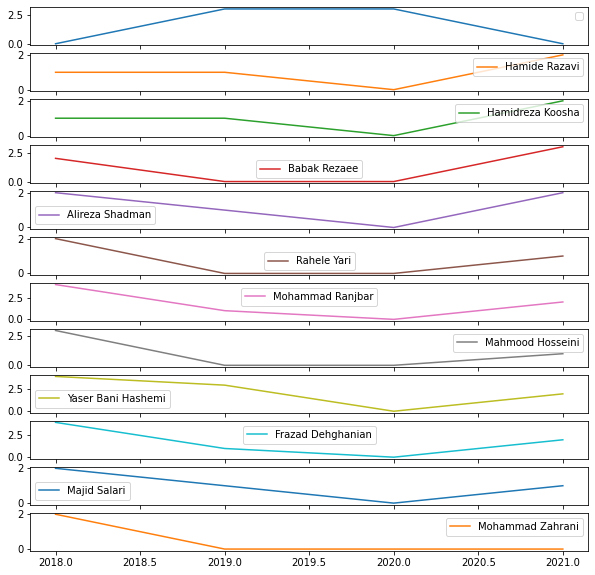

In [97]:
def line_plot(df, plot_type):
  if plot_type == 'sub':
    axes = df.plot(subplots=True, figsize=(10, 10))
  else:
    lines = df.plot(figsize=(10, 10))
line_plot(year_count, 'sub')

In [98]:
prof_mean_dict = {}
sup_refree_result = pd.DataFrame(columns=['prof', 'supervisor', 'refree'])
for k in named_dict.keys():
  if k != '':
    refree = 0
    sup = 0
    sup_c = 0
    ref_c = 0
    is_sup = 0
    prof_mean_dict['prof'] = k
    l = len(named_dict[k])
    prof_mean_dict['refree'] = 0
    prof_mean_dict['supervisor'] = 0
    for i in range(len(named_dict[k])):
      if named_dict[k][i][1] == 3:
        if named_dict[k][i][3] != 'not_defined':
          sup = named_dict[k][i][3] + sup
          sup_c = sup_c + 1
      else:
        if named_dict[k][i][3] != 'not_defined':
          refree  = named_dict[k][i][3] + refree
          ref_c = ref_c + 1
    if sup_c != 0:
      prof_mean_dict['supervisor'] = sup/sup_c
    else:
      prof_mean_dict['supervisor'] = 0
    if ref_c != 0:
      prof_mean_dict['refree'] = refree / ref_c
    else:
      prof_mean_dict['refree'] = 0
    sup_refree_result = sup_refree_result.append(prof_mean_dict, ignore_index=True)
sup_refree_result.to_csv('mean_grade_foreach_prof.csv', index=False)
sup_refree_result

,prof,supervisor,refree
0,Babak Rezaee,18.000000,16.500000
1,Alireza Shadman,15.000000,18.500000
2,Hamide Razavi,17.500000,18.000000
3,Mohammad Ranjbar,19.000000,17.600000
4,Mahmood Hosseini,0.000000,15.750000
5,Hamidreza Koosha,17.000000,18.000000
6,Yaser Bani Hashemi,16.500000,17.200000
7,Frazad Dehghanian,17.666667,16.666667
8,Rahele Yari,0.000000,16.500000
9,Majid Salari,17.000000,18.000000


In [99]:
def plot_stacked(stacked_data, goal):
  if goal == 'degree':
    stacked_data = stacked_data[['prof', 'phd_not_grads', 'master_not_grads']]
    stacked_data.plot(x='prof', kind='bar', stacked=True, title='Stacked Bar with dataframe', figsize=(10,10))
  else:
    stacked_data.plot(x='prof', kind='bar', stacked=True, title='Stacked Bar with dataframe', figsize=(10,10))

# 2. Stacked plot by degree

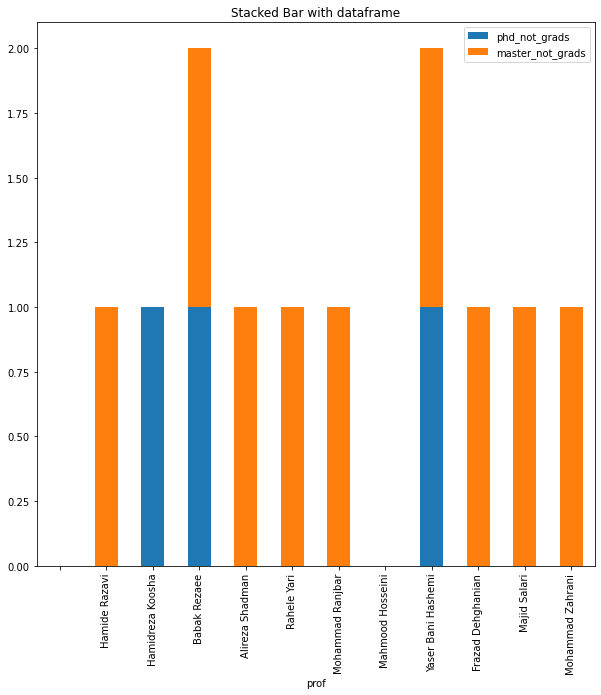

In [100]:
plot_stacked(all_info, 'degree')

In [101]:
def grouped_data(result):
  barWidth = 0.25
  sup_mean = list(result['supervisor'])
  refree_mean = list(result['refree'])

  r1 = np.arange(len(sup_mean))
  r2 = [x + barWidth for x in r1]
  
  plt.bar(r1, sup_mean, color='#7f6d5f', width=barWidth, edgecolor='white', label='as supervisor')
  plt.bar(r2, refree_mean, color='#557f2d', width=barWidth, edgecolor='white', label='as refree')
  
  plt.xlabel('group', fontweight='bold')
  plt.xticks([r + barWidth for r in range(len(sup_mean))], 
            list(result['prof']), rotation = 90)
  
  plt.legend()
  plt.show()

# 3. Grouped plot

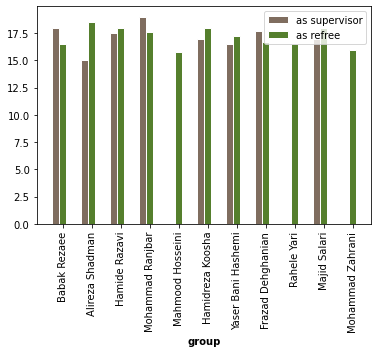

In [102]:
grouped_data(sup_refree_result)

# 4. Pie plot

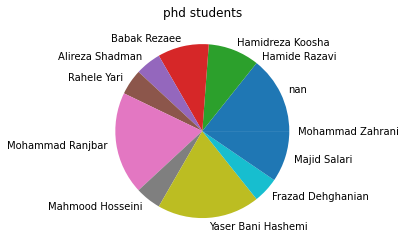

In [117]:
def plot_pie(data, deg):
  if deg == 'master':
    y = list(data['master_count'])
    plt.title('master students')
  else:
    y = list(data['phd_count'])
    plt.title('phd students')
  mylabels = list(data['prof'])
  plt.pie(y, labels = mylabels)
  
  plt.show()
plot_pie(all_info, 'phd')

#5. Get rank

In [104]:
students_data

,Student ID,Name,Degree,Thesis Topic,Approval Date,Defense Date,Grade,supervisor,prof1,prof2,semesters,rank_by_year,year
0,9822743012,Abbasi,Master,Simulation,2021-01-12 00:00:00,2022-12-12 00:00:00,18.0,Babak Rezaee,Alireza Shadman,Hamide Razavi,4,"98,4.5",2021
1,9722743218,Hosseini,PHD,Logistic,2021-02-13 00:00:00,2022-07-11 00:00:00,15.0,Alireza Shadman,Mohammad Ranjbar,Mahmood Hosseini,3,"97,5.0",2021
2,9922743150,Mohammadi,Master,Financial Systems,2020-12-13 00:00:00,2021-10-09 00:00:00,19.0,,,,2,"99,9.5",2020
3,9812743388,Moradi,PHD,Logistic,2021-03-14 00:00:00,-,-,Hamidreza Koosha,Yaser Bani Hashemi,Babak Rezaee,4,"98,-",2021
4,9822743183,Nemati,PHD,Project Control,2019-03-11 00:00:00,2021-04-07 00:00:00,18.34,,,,5,"98,3.668",2019
5,9712743062,Kazemi,PHD,Data Anaylsis,2021-11-28 00:00:00,2023-01-29 00:00:00,20.0,Frazad Dehghanian,Hamidreza Koosha,Mohammad Ranjbar,3,"97,6.666666666666667",2021
6,9712743108,Jahani,Master,Fuzzy Logic,2021-02-18 00:00:00,-,-,Hamide Razavi,Rahele Yari,Babak Rezaee,4,"97,-",2021
7,9812743139,Abhari,Master,Queuing Theory,2021-09-24 00:00:00,2022-02-17 00:00:00,16.78,Majid Salari,Frazad Dehghanian,Yaser Bani Hashemi,1,"98,16.78",2021
8,9722743150,-,-,-,2018-07-01,-,-,Mohammad Ranjbar,Mohammad Zahrani,Frazad Dehghanian,10,"97,-",2018
9,9722743183,-,-,-,2018-07-01,-,-,Yaser Bani Hashemi,Alireza Shadman,Majid Salari,10,"97,-",2018


In [105]:
def get_rank(students_data):
  students = {}
  year = input()
  for i in range(len(students_data)):
    if students_data.loc[i, 'rank_by_year'][:2] == str(year):
      if str(students_data.loc[i, 'rank_by_year'][3:]) != '-':
        students[students_data.loc[i, 'Student ID']] = float(students_data.loc[i, 'rank_by_year'][3:])
  sorted_students = sorted(students.items(), key=lambda x:x[1], reverse=True)
  answer = []
  for i in range(len(sorted_students)):
    print('{}. '.format(i+1),sorted_students[i][0])

In [107]:
get_rank(students_data)

98
1.  9812743139
2.  9822743012
3.  9822743183


# 6. Not defined Students

In [ ]:
def not_defended_students(student_data):
  students_id = (list(set(students_data['Student ID']) - set(students_profs['Stu ID'])))
  students_dict = dict(zip(students_data['Student ID'], students_data['Name']))
  for k,v in students_dict.items():
    if k in students_id:
      print(students_dict[k]) 

In [ ]:
students_data

# 7. stacked by speciality

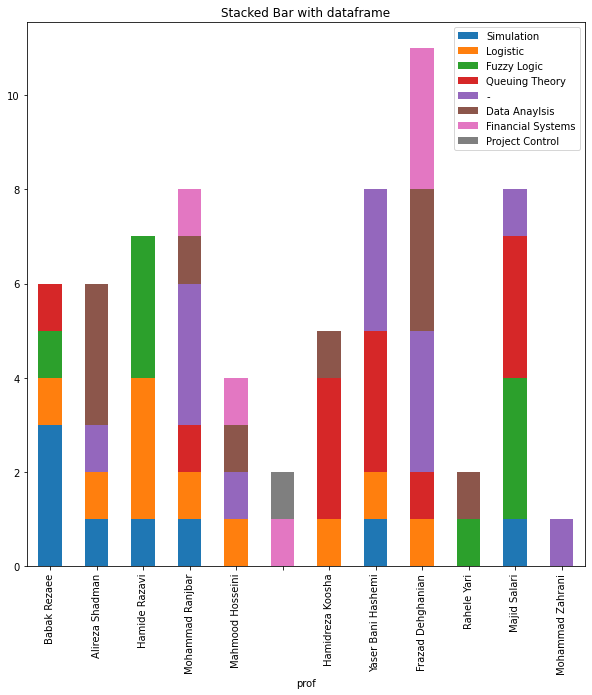

In [134]:
plot_stacked(specs, 'speciality')

# 8. Hbar chart

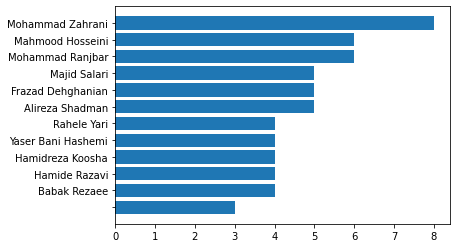

In [65]:
def plot_years(data):
  avg = list(data['years_mean'])
  bars = list(data['prof'])
  y_pos = np.arange(len(bars))
  plt.barh(y_pos, avg)
  plt.yticks(y_pos, bars)
  plt.show()
plot_years(all_info)

# 9. Scatter chart

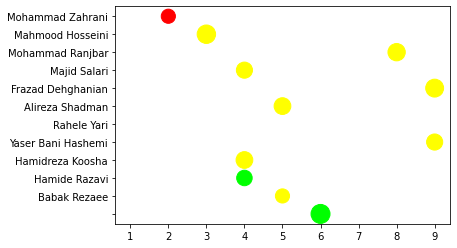

In [66]:
def scatter_plot(data):
  colors = list(data['situation'])

  radius = list(data['grade_mean']*20)
  plt.scatter(
      x=list(data['no. of students']),
      y=list(data['prof']),
      s=radius,
      c=colors,
  )
  plt.show()
scatter_plot(all_info)

# 10. create sheet

In [67]:
def create_sheet(result, stu_data):

  result = result.rename(columns={'prof': 'نام استاد',
                                  'years_mean': 'میانگین سنوات',
                                  'no. of students': 'تعداد دانشجویان',
                                  'grads': 'تعداد دانش آموختگان',
                                  'not_grads': 'تعداد دانشجویان جاری',
                                  'refrees': 'تعداد داوری ها'})
  result = result.drop('situation', axis=1)
  
  longs = stu_data[stu_data['semesters']>6]
  longs['Approval Date'] = longs['Approval Date'].astype(str)
  
  with pd.ExcelWriter('output.xlsx') as writer:
    result.to_excel(writer, sheet_name='Sheet_1')
    longs.to_excel(writer, sheet_name='Sheet_2')
create_sheet(all_info, students_data)

<ipython-input-67-db0f3a13fd55>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  longs['Approval Date'] = longs['Approval Date'].astype(str)


# Menu

In [113]:
all_info = pd.read_csv('/content/all_counts_and_means.csv')
all_info

,prof,phd_count,master_count,years_mean,grade_mean,no. of students,situation,grads,not_grads,phd_grads,phd_not_grads,master_grads,master_not_grads,refrees,2018_count,2019_count,2020_count,2021_count
0,NaN,3.0,3.0,3.0,18.0,6.0,"(0, 1, 0)",0.0,6.0,3.0,0.0,3.0,0.0,4.0,0.0,3.0,3.0,0.0
1,Hamide Razavi,0.0,4.0,4.0,13.0,4.0,"(1, 1, 0)",1.0,3.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,2.0
2,Hamidreza Koosha,2.0,2.0,4.0,13.0,4.0,"(0, 1, 0)",1.0,3.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,0.0,2.0
3,Babak Rezaee,2.0,3.0,5.0,10.0,5.0,"(1, 1, 0)",2.0,3.0,1.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,3.0
4,Alireza Shadman,1.0,4.0,5.0,13.0,5.0,"(1, 1, 0)",1.0,4.0,1.0,0.0,3.0,1.0,3.0,2.0,1.0,0.0,2.0
5,Rahele Yari,1.0,2.0,5.0,11.0,3.0,"(1, 1, 0)",1.0,2.0,1.0,0.0,1.0,1.0,3.0,2.0,0.0,0.0,1.0
6,Mohammad Ranjbar,4.0,3.0,6.0,15.0,7.0,"(1, 1, 0)",1.0,6.0,4.0,0.0,2.0,1.0,5.0,4.0,1.0,0.0,2.0
7,Mahmood Hosseini,1.0,3.0,6.0,15.0,4.0,"(1, 1, 0)",0.0,4.0,1.0,0.0,3.0,0.0,4.0,3.0,0.0,0.0,1.0
8,Yaser Bani Hashemi,4.0,5.0,6.0,13.0,9.0,"(1, 1, 0)",2.0,7.0,3.0,1.0,4.0,1.0,6.0,4.0,3.0,0.0,2.0
9,Frazad Dehghanian,1.0,6.0,6.0,14.0,7.0,"(1, 1, 0)",1.0,6.0,1.0,0.0,5.0,1.0,4.0,4.0,1.0,0.0,2.0


In [135]:
all_info = pd.read_csv('/content/all_counts_and_means.csv')
students_data = pd.read_csv('/content/main_data.csv')
year_count = pd.read_csv('/content/year_count.csv')
sup_refree_result = pd.read_csv('/content/mean_grade_foreach_prof.csv')
specialities = pd.read_csv('/content/specialities.csv')

Enter your choice: 7


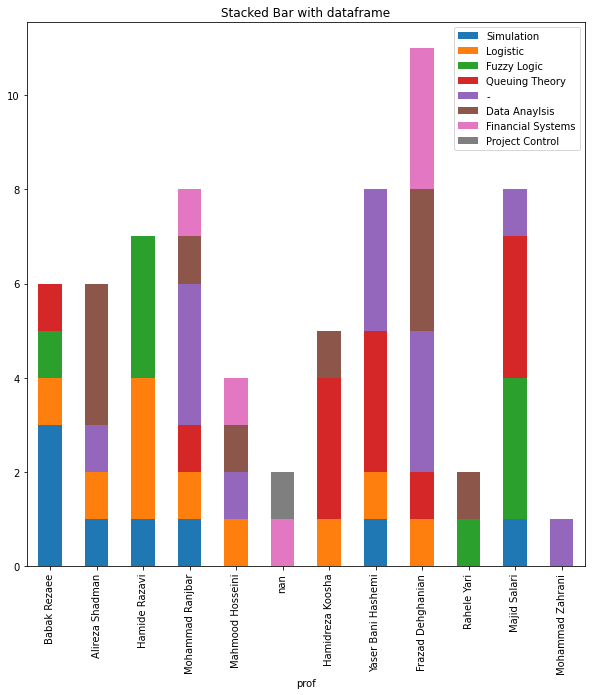

In [137]:
option = int(input('Enter your choice: ')) 
if option == 1:
    plot_type = input('What kind of plot? sub or not?')
    line_plot(year_count, plot_type)
elif option == 2:
    plot_stacked(all_info, 'degree')
elif option == 3:
    grouped_data(sup_refree_result)
elif option == 4:
    plot_pie(all_info, 'phd')
    plot_pie(all_info, 'master')
elif option == 5:
    get_rank(students_data)
elif option == 6:
    not_defended_students(students_data)
elif option == 7:
    plot_stacked(specialities, 'speciality')
elif option == 8:
    plot_years(all_info)
elif option == 9:
    scatter_plot(all_info)
elif option == 10:
    create_sheet(all_info, students_data)
elif option == 0:
    print('Thanks message before exiting')
    exit()
else:
    print('Invalid option. Please enter a number between 1 and 4.')